<a href="https://colab.research.google.com/github/futureme2030/project1/blob/main/check_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석과정: 문제 정의, 가설 설정, 가설 확인 with Data, 해결책 도출
### what-how-why << why-how-what 
#### 그러나 이 프로젝트의 시작은 what이 주어진 상태 
1. **WHY** - 자원 고갈, 지구 온난화, 넘쳐나는 폐기물로 지구가 몸살을 앓고 있다. 그렇기에 이 문제를 해결해야 한다, **왜?** 우리 모두를 위해서. <br/>
패션산업이 환경에 미치는 영향이 광범위한데 생존의 도구로써의 패션이 아닌 자기 표현의 도구로써의 패션이 만연한 현재, <U>**"어떻게" 웹 서비스로 패션산업의 과잉생산 관행을 깨뜨릴 수 있을까?**</U>
 - 환경 오염을 일으키는 주체는 개인과 기업 (기본적으로 인간의 모든 행동은 환경을 파괴한다)
 - 기업의 행동과 개인의 행동을 모두 변화시키기 위한 방법은 무엇이 있을까? 기업들이 과잉생산을 하는 이유는 많이 팔기 위해서이다. 팔고 남으면 세일을 해서 2년 정도 팔고, 재고를 보관하는 비용이 판매를 해서 남는 이익보다 더 크면 폐기를 한다.
 - 이 고리에서 중요한 것은 '수요' 즉, '소비'이다.
 - 우리의 서비스가 개인의 수요를 줄일 수 있다면, 기업은 과잉생산의 관행을 멈출 수 있다. 이는 불필요한 자원 폐기도 막을 수 있다.
2. **HOW** - 그렇다면 "어떻게" 개인의 패션 수요를 줄일 수 있을까?
- 개인은 환경문제에 관심이 있나?
- 개인은 환경문제를 해결하고 싶어하나?
- 개인은 환경문제를 해결하기 위해 어떤 행동을 하고 있나?
- 그들은 어떤 어려움을 겪고 있나? <br/>
> **우리가 풀고 싶은 문제는 환경문제이지만, 이는 곧 환경에 관심이 있는 사람들이 우리 서비스의 잠재적 유저가 될 것, 철저히 유저의 painpoint를 짚어내는 것이 중요** <br/>
> "Make it Easy"

3. **WHAT** - 무엇을 할 수 있을지 파악하기 위해서는 데이터를 통해서 위의 질문들에 답을 내리는 것이 필요



 


# 1. 데이터 읽기


1.1. 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1.2. 데이터 kei에 불러오기

처음 '파일'탭을 누르면 content폴더 안을 보여준다. 따라서 파일을 불러올 때, '/content/data.csv' 이런식으로 경로 설정이 들어간다.` 이때, content 디렉토리명 앞에 './'가 아니라 '/'인 점을 유의한다

In [ ]:
data = pd.read_csv('/content/KEIsurvey2021.csv')
kei = data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (22,158,183) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# 상위 데이터 5개를 출력해본다
kei.head()

,PID,P2020,P2019,P2018,패널,gubun,id,SQ1,SQ1_n2,SQ1_n3,...,AA7_1,AA7_2,AA7_3,AA7_4,AA7_5,AA7_6,AA7_7,AA7_8,AA7_9,AA7_10
0,122,0,0,0,0,1,2504,1,21,360,...,1,0,1,1,0,1,1,0,0,0
1,571,1,1,0,0,2,4124,1,14,222,...,1,0,1,0,0,0,0,0,0,0
2,679,0,0,0,0,1,1253,8,81,1235,...,1,0,1,1,1,1,1,1,1,1
3,789,0,0,0,0,1,1167,13,187,2597,...,1,1,0,0,0,1,1,1,0,0
4,2317,1,1,0,0,2,3440,1,22,373,...,1,1,0,1,1,1,1,1,0,0


In [ ]:
# 전체 데이터 수를 확인한다
kei.info()
print(kei.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Columns: 215 entries, PID to AA7_10
dtypes: float64(15), int64(196), object(4)
memory usage: 8.3+ MB
(5050, 215)


컬럼의 수가 너무 많은 관계로 메타데이터는 csv파일을 열어서 체크

# 데이터 정제 (Data Cleaning/Wrangling)

### 필요한 데이터 선별
The columns that are related to our project are listed below:
- SQ2 성별
- SQ3 나이

<환경에 대한 인식 관련 조사>
- A1 환경관심정도 (**FINAL**) 
- A2 환경문제의 원인 인지정도 (**FINAL**)
- A3 환경문제의 해결 방법 인지정도 (**FINAL**)
- A4 (A4_m2, A4_m3) 우리나라가 직면한 가장 중요한 환경문제(복수응답) ***

<환경 보존을 위한 개인의 실천 관련 항목>
- B1 환경태도 (환경친화적 우선 vs. 생활의 편리함 우선) 
- B3_11 진술별 동의 정도: 미래 세대를 위해 자연을 보호하고 자원을 보전하는 것은 시급하다 
- B4 환경보존 행동별 실천여부 (1~14, 상세항목 O) (X)`
- B5 친환경적 태도 및 생활 습관을 실천 하는데 있어 어려움 (복수응답)***
- B6 친환경적 태도 및 생활 습관을 실천하는데 있어 어려움 (의견별 동의 정도) (1~12) (X)

<br/>

- D3 가장 시급하게 해결해야 할 환경문제 (복수응답, m2, m3 존재) (**FINAL**)
- D5 환경보전 책임이 가장 큰 주체 (1:중앙정부, 2:지방자치단체, 3:기업, 4:시민단체(환경단체), 5:일반국민)
- E4 자녀의 유뮤 (1:있다, 2:없다)



In [ ]:
# 환경에 대한 인식 데이터
data= kei[['SQ2','SQ3','A1','A2','A3','A4','A4_m2','A4_m3','B1','B3_11','B5','B5_m2','B5_m3','B5_m4','B5_m5','B5_m6','B5_m7','B5_m8','B5_m9','D3', 'D3_m2', 'D3_m3']]

In [ ]:
print(data.shape)
print(data.head())
# print(data.info())

(5050, 22)
   SQ2  SQ3  A1  A2  A3  A4  A4_m2  A4_m3  B1  B3_11  ...  B5_m3  B5_m4  \
0    2   54   4   3   3   4      7     11   3      4  ...    NaN    NaN   
1    2   62   3   3   3   3      7     11   3      5  ...    NaN    NaN   
2    2   42   4   4   4   2      7     11   2      5  ...    4.0    3.0   
3    2   57   4   4   4   7      3     11   4      5  ...    7.0    NaN   
4    2   48   4   4   4  11     10      3   1      5  ...    NaN    NaN   

   B5_m5  B5_m6  B5_m7  B5_m8  B5_m9  D3  D3_m2  D3_m3  
0    NaN    NaN    NaN    NaN    NaN   3     10     11  
1    NaN    NaN    NaN    NaN    NaN   6     11      8  
2    NaN    NaN    NaN    NaN    NaN   2      8      1  
3    NaN    NaN    NaN    NaN    NaN  11      8      2  
4    NaN    NaN    NaN    NaN    NaN  11      8      5  

[5 rows x 22 columns]


In [ ]:
# 결측치 체크 윗부분
data.isnull().sum().head(34)

SQ2         0
SQ3         0
A1          0
A2          0
A3          0
A4          0
A4_m2       0
A4_m3       0
B1          0
B3_11       0
B5          0
B5_m2     963
B5_m3    2433
B5_m4    4348
B5_m5    4841
B5_m6    4978
B5_m7    5024
B5_m8    5033
B5_m9    5050
D3          0
D3_m2       0
D3_m3       0
dtype: int64

In [ ]:
#결측치 체크 아랫부분
data.isnull().sum().tail(35)

SQ2         0
SQ3         0
A1          0
A2          0
A3          0
A4          0
A4_m2       0
A4_m3       0
B1          0
B3_11       0
B5          0
B5_m2     963
B5_m3    2433
B5_m4    4348
B5_m5    4841
B5_m6    4978
B5_m7    5024
B5_m8    5033
B5_m9    5050
D3          0
D3_m2       0
D3_m3       0
dtype: int64

- 복수 응답 문항인 B5에서 결측치가 발견 됨.   
- 그러나 복수 응답 문항이더라도 응답자 전원 적어도 '하나의 응답'은 했다 
  - B5는 "친환경적 태도 및 생활습관을 실천 하는데 있어 어려움(복수응답)"임

# EDA (Exploratory Data Analysis)
자유롭게 뜯어보기

### 응답자를 분석해보자

#### 성비 분석

In [ ]:
# 응답자의 성비를 체크: SQ2에서 '1'='male', '2'='female'
# groupby만 사용하면 결과는 함수가 반환 됨
data.groupby(['SQ2'])

gender_ratio = data.groupby(['SQ2'])['SQ2'].sum()
print(gender_ratio)

SQ2
1    2522
2    5056
Name: SQ2, dtype: int64


- 성비가 남자:여자 = (대략) 1:2
- !!! 분석할 때 성별 데이터를 분리해서 분석해 보는 것도 좋을 듯 (이 두 그룹 사이에 유의미한 차이가 있을 수 있음) !!!

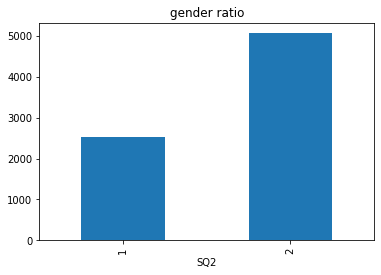

In [ ]:
# 응답자의 성비(카운드)를 그래프로
gender_ratio.plot(kind='bar', title='gender ratio')

#### 나이 분석
- `.describe()`를 이용해서 데이터 분포를 대략적으로 확인 할 수 있음 (descriptive statistics 체크 포인트를 보여줌)
  - **count**
  - min, max
  - standard deviation
  - 25%, 50%, 75%
  

In [ ]:
# 연령에 대한 정보를 확인 (여기서 'SQ3'의 data type이 int64임을 위에서 확인함)
data['SQ3'].describe()

count    5050.000000
mean       45.586931
std        13.358905
min        19.000000
25%        35.000000
50%        47.000000
75%        57.000000
max        69.000000
Name: SQ3, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


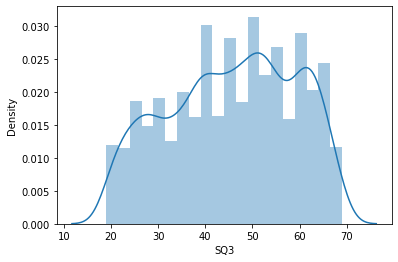

In [ ]:
# .distplot()은 density plot을 보여줌 with soothed line plot
sns.distplot(data['SQ3'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SQ2     5050 non-null   int64  
 1   SQ3     5050 non-null   int64  
 2   A1      5050 non-null   int64  
 3   A2      5050 non-null   int64  
 4   A3      5050 non-null   int64  
 5   A4      5050 non-null   int64  
 6   A4_m2   5050 non-null   int64  
 7   A4_m3   5050 non-null   int64  
 8   B1      5050 non-null   int64  
 9   B3_11   5050 non-null   int64  
 10  B5      5050 non-null   int64  
 11  B5_m2   4087 non-null   float64
 12  B5_m3   2617 non-null   float64
 13  B5_m4   702 non-null    float64
 14  B5_m5   209 non-null    float64
 15  B5_m6   72 non-null     float64
 16  B5_m7   26 non-null     float64
 17  B5_m8   17 non-null     float64
 18  B5_m9   0 non-null      float64
 19  D3      5050 non-null   int64  
 20  D3_m2   5050 non-null   int64  
 21  D3_m3   5050 non-null   int64  
dtype

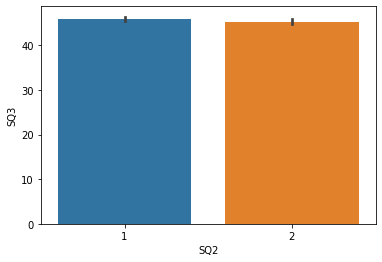

In [ ]:
sns.barplot(x='SQ2', y='SQ3', data=data, estimator=np.mean)

- 성별간 응답자의 평균 나이는 큰 차이가 없음

##### 나이대별로 분석하기 위한 초석
- 연속형 데이터인 나이를 범주형 데이터로 변환하기

In [ ]:
# pandas.cut() 함수를 활용
# pandas.cut(x, bins, labels) - x는 반드시 1-dimensional
age_category = pd.cut(data.SQ3, bins=[0,19,29,39,49,59,69],
       labels=['10s','20s','30s','40s','50s','60s'])
# DataFrame.insert(loc, column, value)
data.insert(2,'age_group', age_category)
data.head()

,SQ2,SQ3,age_group,A1,A2,A3,A4,A4_m2,A4_m3,B1,...,B5_m3,B5_m4,B5_m5,B5_m6,B5_m7,B5_m8,B5_m9,D3,D3_m2,D3_m3
0,2,54,50s,4,3,3,4,7,11,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10,11
1,2,62,60s,3,3,3,3,7,11,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,11,8
2,2,42,40s,4,4,4,2,7,11,2,...,4.0,3.0,NaN,NaN,NaN,NaN,NaN,2,8,1
3,2,57,50s,4,4,4,7,3,11,4,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,11,8,2
4,2,48,40s,4,4,4,11,10,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,8,5


In [ ]:
# 나이대별로 묶어볼까?
data['age_group'].value_counts(normalize=True)

50s    0.233465
40s    0.231089
60s    0.195842
30s    0.179802
20s    0.150693
10s    0.009109
Name: age_group, dtype: float64

- 4050인 응답자의 비율이 높았고
- 10대 응답자의 비율이 매우 낮은 것을 볼 수 있음

In [ ]:
data_by_age = data.groupby(['age_group','SQ2']).mean()
data_by_age

SQ3        A1        A2        A3        A4     A4_m2  \
age_group SQ2                                                                
10s       1    19.000000  3.708333  3.833333  3.625000  5.375000  4.791667   
          2    19.000000  3.909091  3.818182  3.454545  5.363636  4.409091   
20s       1    24.917808  3.652055  3.583562  3.369863  5.161644  4.693151   
          2    24.974747  3.770202  3.611111  3.411616  4.856061  4.838384   
30s       1    35.248292  3.712984  3.551253  3.350797  4.738041  4.485194   
          2    34.793177  3.756930  3.492537  3.307036  4.628998  4.795309   
40s       1    44.638796  3.782609  3.468227  3.306020  4.461538  4.739130   
          2    44.514938  3.824253  3.442882  3.277680  4.971880  4.625659   
50s       1    53.984848  3.941077  3.531987  3.363636  4.760943  4.715488   
          2    54.153846  4.003419  3.429060  3.278632  4.832479  4.861538   
60s       1    63.595618  4.069721  3.619522  3.438247  4.886454  4.701195   
          2    63.383984  4.121150  3.501027  3.377823  5.137577  5.416838   

                  A4_m3        B1     B3_11        B5  ...     B5_m3  \
age_group SQ2                                          ...             
10s       1    5.500000  2.833333  4.125000  4.416667  ...  4.250000   
          2    5.227273  2.636364  4.454545  4.500000  ...  3.600000   
20s       1    4.857534  2.915068  4.098630  4.375342  ...  4.060914   
          2    4.954545  2.558081  4.300505  4.333333  ...  4.196078   
30s       1    4.551253  2.669704  4.173121  4.298405  ...  4.163090   
          2    4.690832  2.486141  4.409382  4.232409  ...  4.322581   
40s       1    4.675585  2.478261  4.372910  4.003344  ...  4.110787   
          2    4.875220  2.295255  4.562390  3.991213  ...  4.406040   
50s       1    4.602694  2.356902  4.496633  4.116162  ...  3.827119   
          2    5.302564  2.111111  4.668376  3.943590  ...  3.972414   
60s       1    4.844622  2.135458  4.601594  4.115538  ...  3.839080   
          2    4.958932  1.876797  4.657084  4.084189  ...  3.907080   

                  B5_m4     B5_m5     B5_m6  B5_m7     B5_m8  B5_m9        D3  \
age_group SQ2                                                                   
10s       1    4.000000  2.333333       NaN    NaN       NaN    NaN  6.083333   
          2    1.666667  3.000000  7.000000    NaN       NaN    NaN  6.272727   
20s       1    4.037037  5.533333  5.200000    6.0  7.000000    NaN  5.216438   
          2    3.969697  4.500000  4.000000    1.5  4.000000    NaN  5.565657   
30s       1    4.254545  4.500000  3.666667    4.6  2.500000    NaN  5.280182   
          2    3.684932  5.068966  3.625000    3.0       NaN    NaN  5.784648   
40s       1    4.431579  3.448276  4.600000    3.8  4.800000    NaN  5.424749   
          2    4.500000  4.111111  4.857143    4.0       NaN    NaN  5.959578   
50s       1    3.835616  4.111111  6.000000    8.0  2.000000    NaN  5.301347   
          2    3.800000  4.565217  5.100000    3.8  4.500000    NaN  6.054701   
60s       1    4.013514  4.350000  4.500000    4.5  3.666667    NaN  5.898406   
          2    3.905660  2.857143  4.833333    2.0       NaN    NaN  5.917864   

                  D3_m2     D3_m3  
age_group SQ2                      
10s       1    5.958333  4.125000  
          2    5.500000  6.227273  
20s       1    5.441096  5.794521  
          2    5.974747  6.032828  
30s       1    5.881549  5.906606  
          2    6.098081  6.181237  
40s       1    5.538462  5.961538  
          2    6.015817  6.214411  
50s       1    5.838384  5.813131  
          2    6.329915  6.499145  
60s       1    6.071713  5.679283  
          2    6.712526  6.447639  

[12 rows x 21 columns]

!!! 뭔가 insight가 나옴???


# 데이터 분석
## 질문별 응답수와 비율을 알아볼까

### 환경에 관심이 있는지 여부
- A1 환경관심정도 *** ordered_interest
- A2 환경문제의 원인 인지정도 *** ordered_recog
- A3 환경문제의 해결 방법 인지정도 *** ordered_knowsol
- B1 환경 친화적 우선 vs 편리함 우선 *** ordered_will (얘는 스케일이 달라서 서술로 추가하도록!)

##### A1 환경 관심정도(1: 관심 없음, 5: 매우 관심있음)

In [ ]:
# value_counts()는 그룹화된 데이터의 카운트 값을 리턴
data_interest_count = pd.DataFrame(data['A1'].value_counts())
# normalize=True 옵션을 사용하면 해당 데이터가 전체 데이터에서 차지하는 비중을 알 수 있다
data_interest_percent = pd.DataFrame(data['A1'].value_counts(normalize=True))

data_interest_df = data_interest_count.merge(data_interest_percent, left_index=True, right_index=True)
data_interest_df.columns=['A1 응답 수', 'A1 비율']
ordered_interest = data_interest_df.sort_index()
# print(data_interest_df)
print(ordered_interest)

   A1 응답 수     A1 비율
1       17  0.003366
2       93  0.018416
3     1240  0.245545
4     2859  0.566139
5      841  0.166535


- 1은 전혀 관심 없음, 5는 매우 관심 있음
- 4, 5의 값을 더한 약 73%의 응답자가 환경에 관심이 있다고 응답함

Text(0.5, 1.0, 'interested in the environment')

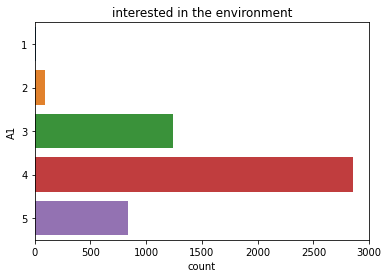

In [ ]:
# 응답자의 답변 현황 시각화
plt.figure()
sns.countplot(y='A1', data=data)
plt.title('interested in the environment')

In [ ]:
# stacked bar chart를 만들어 보자
# 1. 행렬을 바꾼다 (행: A1 비율, 열 1, 2, 3, 4, 5)
transposed_A1 = pd.DataFrame.transpose(ordered_interest)
transposed_A1

,1,2,3,4,5
A1 응답 수,17.000000,93.000000,1240.000000,2859.000000,841.000000
A1 비율,0.003366,0.018416,0.245545,0.566139,0.166535


#### A2 환경문제의 원인 인지정도 (1: 전혀 모른다, 5: 매우 잘 알고 있다)

In [ ]:
data_recog_count = pd.DataFrame(data['A2'].value_counts())
# normalize=True 옵션을 사용하면 해당 데이터가 전체 데이터에서 차지하는 비중을 알 수 있다
data_recog_percent = pd.DataFrame(data['A2'].value_counts(normalize=True))

data_recog_df = data_recog_count.merge(data_recog_percent, left_index=True, right_index=True)
data_recog_df.columns=['A2 응답 수', 'A2 비율']
ordered_recog = data_recog_df.sort_index()

- 환경문제의 원인을 알고 있다고 응답한 비율은 약 53%, 중립반응이 약 42%, 모른다는 반응이 약 5%

Text(0.5, 1.0, 'know the source of the environmental problems')

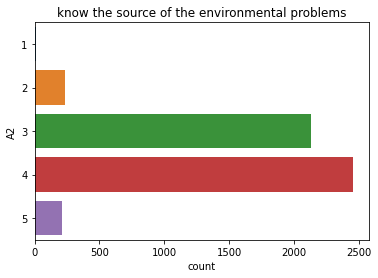

In [ ]:
# 응답자의 답변 현황 시각화
plt.figure()
sns.countplot(y='A2', data=data)
plt.title('know the source of the environmental problems')

In [ ]:
# transpose
transposed_A2 = pd.DataFrame.transpose(ordered_recog)
transposed_A2

,1,2,3,4,5
A2 응답 수,12.000000,234.000000,2135.000000,2460.000000,209.000000
A2 비율,0.002376,0.046337,0.422772,0.487129,0.041386


#### A3 환경문제 해결방법 인지 정도 (1: 전혀 모른다, 5: 매우 잘 알고 있다)

In [ ]:
data_knowsol_count = pd.DataFrame(data['A3'].value_counts())
# normalize=True 옵션을 사용하면 해당 데이터가 전체 데이터에서 차지하는 비중을 알 수 있다
data_knowsol_percent = pd.DataFrame(data['A3'].value_counts(normalize=True))

data_knowsol_df = data_knowsol_count.merge(data_knowsol_percent, left_index=True, right_index=True)
data_knowsol_df.columns=['A3 응답 수', 'A3 비율']
ordered_knowsol = data_knowsol_df.sort_index()
data_knowsol_df

,A3 응답 수,A3 비율
3,2483,0.491683
4,1956,0.387327
2,455,0.090099
5,139,0.027525
1,17,0.003366


- 중립이라고 응답한 비율이 가장 높은 약 49%
- 방법을 알고 있다고 응답한 비율이 약 41%로
  - 환경에 관심이 있다고 응답한 비율 73%
  - 환경문제의 원인을 알고 있다고 응답한 비율 53%
- 위의 두 데이터와 비교했을 때 응답률이 낮은 것을 알 수 있음 

!!! 환경에 관심이 있다고 한 사람들의 데이터만 따로 뽑아서 한 번 분석해 볼까? (관심은 있는데, 방법을 잘 모르는 사람의 비율을 알아보는 것도 좋을 것 같아)

Text(0.5, 1.0, 'know how to solve the environmental problems')

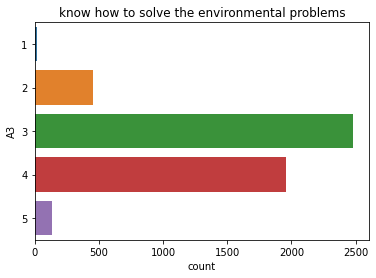

In [ ]:
plt.figure()
sns.countplot(y='A3', data=data)
plt.title('know how to solve the environmental problems')

In [ ]:
# transpose
transposed_A3 = pd.DataFrame.transpose(ordered_knowsol)
transposed_A3

,1,2,3,4,5
A3 응답 수,17.000000,455.000000,2483.000000,1956.000000,139.000000
A3 비율,0.003366,0.090099,0.491683,0.387327,0.027525


#### B1 환경친화적 우선 vs. 편리함 우선
1: 환경 친화적 우선 ~ 5: 편리함 우선

In [ ]:
# value_counts()는 그룹화된 데이터의 카운트 값을 리턴
data_will_count = pd.DataFrame(data['B1'].value_counts())
# normalize=True 옵션을 사용하면 해당 데이터가 전체 데이터에서 차지하는 비중을 알 수 있다
data_will_percent = pd.DataFrame(data['B1'].value_counts(normalize=True))

data_will_df = data_will_count.merge(data_will_percent, left_index=True, right_index=True)
data_will_df.columns=['B1 응답 수', 'B1 비율']
ordered_will = data_will_df.sort_index()
# print(data_will_df)
print(ordered_will)

   B1 응답 수     B1 비율
1      970  0.192079
2     2182  0.432079
3     1084  0.214653
4      706  0.139802
5      108  0.021386


Text(0.5, 1.0, 'willingness to take actions for the environment')

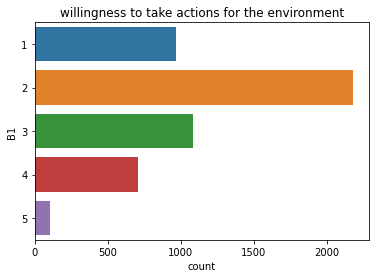

In [ ]:
plt.figure()
sns.countplot(y='B1', data=data)
plt.title('willingness to take actions for the environment')

In [ ]:
transposed_B1 = pd.DataFrame.transpose(ordered_will)
transposed_B1

,1,2,3,4,5
B1 응답 수,970.000000,2182.000000,1084.000000,706.000000,108.000000
B1 비율,0.192079,0.432079,0.214653,0.139802,0.021386


#### B3_11 미래 세대를 위해 자연을 보호하고 자원을 보전하는 것은 시급하다 
(1: 전혀 동의하지 않는다, 5: 매우 동의한다)

In [ ]:
# value_counts()는 그룹화된 데이터의 카운트 값을 리턴
data_urgent_count = pd.DataFrame(data['B3_11'].value_counts())
# normalize=True 옵션을 사용하면 해당 데이터가 전체 데이터에서 차지하는 비중을 알 수 있다
data_urgent_percent = pd.DataFrame(data['B3_11'].value_counts(normalize=True))

data_urgent_df = data_urgent_count.merge(data_urgent_percent, left_index=True, right_index=True)
data_urgent_df.columns=['B3_11 응답 수', 'B3_11 비율']
ordered_urgent = data_urgent_df.sort_index()
# print(data_urgent_df)
print(ordered_urgent)

   B3_11 응답 수  B3_11 비율
1          10  0.001980
2          56  0.011089
3         505  0.100000
4        1545  0.305941
5        2934  0.580990


Text(0.5, 1.0, 'environmental protection is a pressing issue')

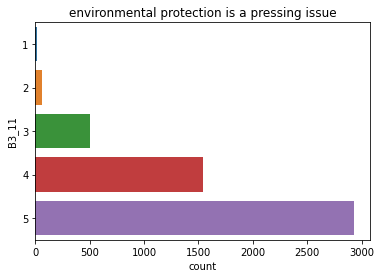

In [ ]:
plt.figure()
sns.countplot(y='B3_11', data=data)
plt.title('environmental protection is a pressing issue')

#### 100% stacked horizontal bar chart 그리기
**사용할 데이터 프레임** : 응답수 or 비율 -> 선택
- transposed_A1
- transposed_A2
- transposed_A3
- transposed_B1   <br/>

**리커트 차트 코드가 다른 부분 해결**
- y축을 질문으로 
- 스케일 코드를 "매우 부정 ~ 매우 긍정"으로 범례 생성하기

#### 응답수로 그리기

In [ ]:
# 데이터 프레임 합치기
combined_As = pd.concat([transposed_A1, transposed_A2, transposed_A3, transposed_B1])
# combined_As
combined_As_counts = combined_As.loc[['A1 응답 수', 'A2 응답 수', 'A3 응답 수', 'B1 응답 수']]
combined_As_counts

,1,2,3,4,5
A1 응답 수,17.0,93.0,1240.0,2859.0,841.0
A2 응답 수,12.0,234.0,2135.0,2460.0,209.0
A3 응답 수,17.0,455.0,2483.0,1956.0,139.0
B1 응답 수,970.0,2182.0,1084.0,706.0,108.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51025 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45813 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51025 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45813 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

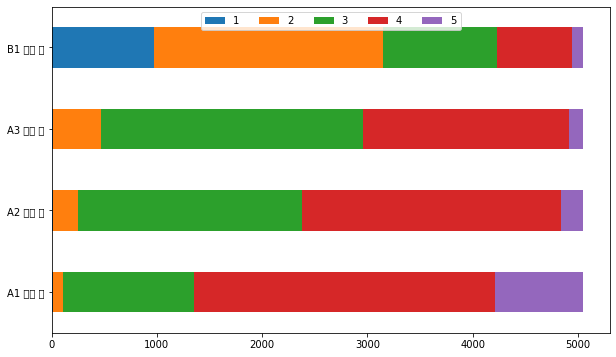

In [ ]:
combined_As_counts.plot(kind='barh', figsize=(10,6), stacked=True)
plt.legend(loc = "upper center", ncol=5)
plt.show()

#### 비율로 그리기

In [ ]:
combined_As = pd.concat([transposed_A1, transposed_A2, transposed_A3, transposed_B1])
combined_As_ratio = combined_As.loc[['A1 비율', 'A2 비율', 'A3 비율', 'B1 비율']]
combined_As_ratio

,1,2,3,4,5
A1 비율,0.003366,0.018416,0.245545,0.566139,0.166535
A2 비율,0.002376,0.046337,0.422772,0.487129,0.041386
A3 비율,0.003366,0.090099,0.491683,0.387327,0.027525
B1 비율,0.192079,0.432079,0.214653,0.139802,0.021386


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0, flags=flags)


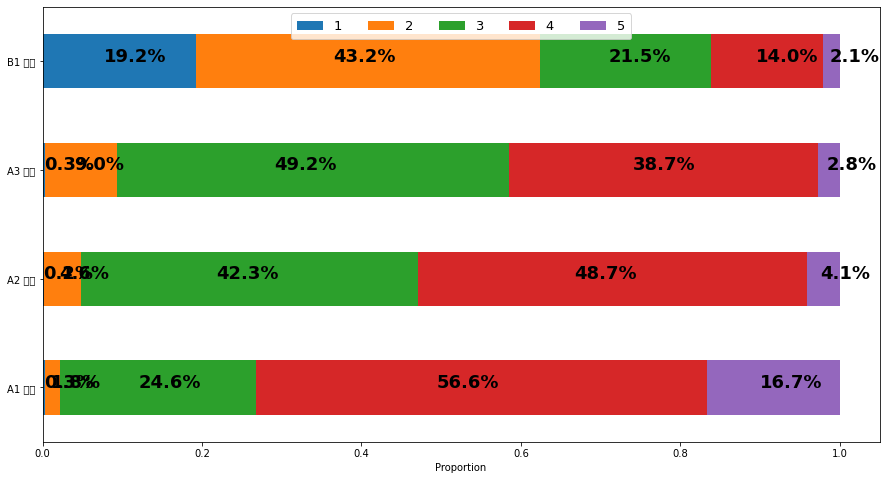

In [ ]:
legend_code = ['strongly disagree', 'diagree', 'neutral', 'agree', 'strongly agree']
bars = combined_As_ratio.plot(
    kind='barh', 
    stacked=True,
    figsize=(15,8))
plt.legend(loc = "upper center", ncol=5, borderpad=0.5, fontsize=13)
plt.xlabel("Proportion")

# 비율 표시하기 with proportion + 비율이 나타나는 위치 조정 with x_loc
for n, x in enumerate([*combined_As_ratio.index.values]):
  for (proportion, x_loc) in zip(combined_As_ratio.loc[x], combined_As_ratio.loc[x].cumsum()):

    plt.text(x=(x_loc - proportion) + (proportion / 2.5),
             y=n ,
             s=f'{np.round(proportion*100, 1)}%',
             color="black",
             fontsize=18,
             fontweight="bold")
    
# 문제 발생함 -> 1과 2를 응답한 비율이 너무 적음 - 비율을 표시할 공간이 부족

plt.show()

- B1의 경우 친환경적 행동이 우선이라고 답변한 비율이 62.4%
- 친환경적 행동과 편리함 중 하나를 선택하지 못한 중립의 비율은 21.5%
- 즉 편리함이 우선이라고 생각한 16.1%의 응답자를 제외한 83.9%가 우리 서비스의 잠재적 유저가 될 수 있다.

#### 데이터 프레임 csv로 변환하기


In [ ]:
# ratio 파일을 백분율 파일로 바꾸기
combined_As_ratio = combined_As_ratio * 100
combined_As_ratio = combined_As_ratio.round(1)
combined_As_ratio


,1,2,3,4,5
A1 비율,0.3,1.8,24.6,56.6,16.7
A2 비율,0.2,4.6,42.3,48.7,4.1
A3 비율,0.3,9.0,49.2,38.7,2.8
B1 비율,19.2,43.2,21.5,14.0,2.1


In [ ]:
# .to_csv()활용 
# B1 데이터 삭제하기 (최종본에는 포함 X)
combined_As_ratio = combined_As_ratio[:-1]
combined_As_counts = combined_As_counts[:-1]
combined_As_ratio.to_csv('/content/combined_As_ratio.csv', sep=',', na_rep='NaN')
combined_As_counts.to_csv('/content/combined_As_counts.csv', sep=',', na_rep='NaN')

## 복수응답형 데이터 - 막대 그래프 그리기
1. 일단 관련된 컬럼만 따로 떼오기
2. 결측치에 0을 넣기
3. 컬럼별로 특정 응답의 수를 카운드 (.value_counts())
4. 1-5 -> 별로 카운드 합치기
5. 막대 그래프

---
1. 컬럼별로 list를 생성
2. python for문을 돌려서 카운트
3. dataframe을 만듦
4. 막대 그래프

### 1. 데이터 정제 - null값을 0으로 치환
- A4 (A4_m2, A4_m3) 우리나라가 직면한 가장 중요한 환경문제(복수응답)
- B5 친환경적 태도 및 생활 습관을 실천 하는데 있어 어려움 (복수응답) (m1~m9, 상세항목 X)
- D3 가장 시급한 환경문제 (m2~m3)

In [ ]:
# 일단 필요한 컬럼만 가져와서 df 만들기
data_multi = data= kei[['A4','A4_m2','A4_m3','B5', 'B5_m2', 'B5_m3', 'B5_m4','B5_m5','B5_m6','B5_m7','B5_m8', 'B5_m9', 'D3', 'D3_m2', 'D3_m3']]
data_multi

,A4,A4_m2,A4_m3,B5,B5_m2,B5_m3,B5_m4,B5_m5,B5_m6,B5_m7,B5_m8,B5_m9,D3,D3_m2,D3_m3
0,4,7,11,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10,11
1,3,7,11,7,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,11,8
2,2,7,11,7,2.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,2,8,1
3,7,3,11,2,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,11,8,2
4,11,10,3,3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,6,12,1,6,5.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,2,11,10
5046,2,4,9,7,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,11
5047,3,4,1,7,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,8,4,11
5048,2,11,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,3


In [ ]:
# want to check how many NaN in D3 columns
data_multi[['D3', 'D3_m2', 'D3_m3']].isnull().sum() 
# no NaN found

D3       0
D3_m2    0
D3_m3    0
dtype: int64

In [ ]:
# NaN을 .fillna()를 이용해 0으로 치환
data_multi = data_multi.fillna(0)
# Nan을 .replace()를 이용해 0으로 치환하는 법
# data_multi = data_multi.replace(np.nan, 0)
data_multi.head()

,A4,A4_m2,A4_m3,B5,B5_m2,B5_m3,B5_m4,B5_m5,B5_m6,B5_m7,B5_m8,B5_m9,D3,D3_m2,D3_m3
0,4,7,11,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,10,11
1,3,7,11,7,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,11,8
2,2,7,11,7,2.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,2,8,1
3,7,3,11,2,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,11,8,2
4,11,10,3,3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,8,5


### 2. 각 컬럼별 응답번호별 빈도수 데이터프레임 생성

In [ ]:
# value_counts()는 그룹화된 데이터의 카운트 값을 리턴
A4_count = pd.DataFrame(data_multi['A4'].value_counts())
# print(A4_count)
A42_count = pd.DataFrame(data_multi['A4_m2'].value_counts())
# print(A42_count)
A43_count = pd.DataFrame(data_multi['A4_m3'].value_counts())
# print(A43_count)

In [ ]:
# B5
B5_count = pd.DataFrame(data_multi['B5'].value_counts())
B52_count = pd.DataFrame(data_multi['B5_m2'].value_counts())
# print(B52_count)
B53_count = pd.DataFrame(data_multi['B5_m3'].value_counts())
# print(B53_count)
B54_count = pd.DataFrame(data_multi['B5_m4'].value_counts())
# print(B54_count)
B55_count = pd.DataFrame(data_multi['B5_m5'].value_counts())
# print(B55_count)
B56_count = pd.DataFrame(data_multi['B5_m6'].value_counts())
# print(B56_count)
B57_count = pd.DataFrame(data_multi['B5_m7'].value_counts())
B58_count = pd.DataFrame(data_multi['B5_m8'].value_counts())
# print(B58_count)
# B5_m9에는 응답자 없음
# B59_count = pd.DataFrame(data_multi['B5_m9'].value_counts())

In [ ]:
D3_count = pd.DataFrame(data_multi['D3'].value_counts())
D32_count = pd.DataFrame(data_multi['D3_m2'].value_counts())
D33_count = pd.DataFrame(data_multi['D3_m3'].value_counts())
# print(D3_count, D32_count, D33_count)

#### A4, B5끼리 데이터프레임 병합


Pandas.concat()를 사용해서 df 병합하기
- index를 기준으로 join='inner' 사용
- axis=1 설정해서 가로로 합병



A4관련 컬럼에는 결측치가 없었기 때문에 '0'이 존재하지 않음

In [ ]:
A4 = pd.concat([A4_count, A42_count, A43_count], axis=1, join='inner')
ordered_A4 = A4.sort_index()
# print(A4)
# print(ordered_A4)

B5 관련 컬럼에는 결측치(NaN)가 많이 존재 + 한 컬럼에 모든 응답이 없는 경우가 대부분
- join='inner'사용하면 안 됨!
- 합친 뒤에 필요없는 0과 관련된 데이터는 삭제

In [ ]:
B5 = pd.concat([B5_count, B52_count, B53_count, B54_count, B55_count, B56_count, B57_count, B58_count], axis=1)
# 값이 존재하지 않는 경우 NaN이 나옴, 이를 다시 0으로 치환 (나중에 각 행에 있는 숫자들을 더하는 연산을 하기 위해)
B5 = B5.fillna(0).sum()

# print(B5)
ordered_B5 = B5.sort_index()
# print(ordered_B5)

D3 에는 결측치 (NaN)가 없었다. 따라서 '0'은 존재하지 않는다
ㅁ4와 같이 join='inner'를 사용해서 합치기

In [ ]:
D3 = pd.concat([D3_count, D32_count, D33_count], axis=1, join='inner')
ordered_D3 = D3.sort_index()
# print(D3.head())
# print(ordered_D3.head())

      D3  D3_m2  D3_m3
8   1080    930    786
2    952    751    625
1    922    798    742
11   732    850    735
10   342    403    566
    D3  D3_m2  D3_m3
1  922    798    742
2  952    751    625
3  213    327    389
4   94    107    124
5  242    281    397


#### 각 행마다 값을 더하기


In [ ]:
# A4부터
ordered_A4['A4_sum'] = ordered_A4.sum(axis=1)
print(ordered_A4)
# leave only A4_sum
A4_result = ordered_A4[['A4_sum']]
A4_result['A4_ratio'] = A4_result / data_multi.shape[0]
# print(data_multi.shape[0])
print(A4_result)

      A4  A4_m2  A4_m3  A4_sum
1    738    663    619    2020
2    844    870    866    2580
3   1056   1112   1154    3322
4    371    432    441    1244
5    126    135    120     381
6    208    170    173     551
7    691    680    669    2040
8     49     54     50     153
9    239    249    228     716
10    67     70     80     217
11   526    507    522    1555
12   135    108    123     366
    A4_sum  A4_ratio
1     2020  0.400000
2     2580  0.510891
3     3322  0.657822
4     1244  0.246337
5      381  0.075446
6      551  0.109109
7     2040  0.403960
8      153  0.030297
9      716  0.141782
10     217  0.042970
11    1555  0.307921
12     366  0.072475


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# B5
ordered_B5['B5_sum'] = ordered_B5.sum(axis=1)
print(ordered_B5)
# leave only B5_sum
B5_result = ordered_B5[['B5_sum']]
B5_result['B5_ratio'] = B5_result / data_multi.shape[0]
print('before:', B5_result)
B5_result = B5_result[1:]

# print(data_multi.shape[0])
print(B5_result.head())

        B5  B5_m2  B5_m3  B5_m4  B5_m5   B5_m6   B5_m7   B5_m8   B5_sum
0.0    0.0    963   2433   4348   4841  4978.0  5024.0  5033.0  27620.0
1.0  622.0    571    353    105     33     5.0     2.0     3.0   1694.0
2.0  893.0    710    460    118     26     8.0     5.0     3.0   2223.0
3.0  810.0    642    429    124     35    11.0     4.0     2.0   2057.0
4.0  753.0    576    384     81     20    11.0     5.0     4.0   1834.0
5.0  516.0    353    232     64     22    10.0     4.0     0.0   1201.0
6.0  202.0    167    113     52     21     8.0     2.0     0.0    565.0
7.0  864.0    779    443    100     30    12.0     3.0     4.0   2235.0
8.0  338.0    273    188     54     20     7.0     1.0     1.0    882.0
9.0   52.0     16     15      4      2     0.0     0.0     0.0     89.0
before:       B5_sum  B5_ratio
0.0  27620.0  5.469307
1.0   1694.0  0.335446
2.0   2223.0  0.440198
3.0   2057.0  0.407327
4.0   1834.0  0.363168
5.0   1201.0  0.237822
6.0    565.0  0.111881
7.0   2235.0  0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# D3 가장 시급한 환경문제
ordered_D3['D3_sum'] = ordered_D3.sum(axis=1)
print(ordered_D3)
# leave only D3_sum
D3_result = ordered_D3[['D3_sum']]
D3_result['D3_ratio'] = D3_result / data_multi.shape[0]
# print(data_multi.shape[0])
print(D3_result)

      D3  D3_m2  D3_m3  D3_sum
1    922    798    742    2462
2    952    751    625    2328
3    213    327    389     929
4     94    107    124     325
5    242    281    397     920
6    173    227    286     686
7    168    201    211     580
8   1080    930    786    2796
9    123    174    185     482
10   342    403    566    1311
11   732    850    735    2317
12     9      1      4      14
    D3_sum  D3_ratio
1     2462  0.487525
2     2328  0.460990
3      929  0.183960
4      325  0.064356
5      920  0.182178
6      686  0.135842
7      580  0.114851
8     2796  0.553663
9      482  0.095446
10    1311  0.259604
11    2317  0.458812
12      14  0.002772


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##### 이건 데이터가 우지 중복이 되서 내가 잘못 판단한 거임 - 그러나 공부 됨
이런...복수응답에 같은 답을 기입한 사람들이 있다. (X, 없어!!)<br/>
이 경우, 중복된 값을 없애야 하는데 <br/>
1. 각 행을 list로 만든다 -> row_list라고 부르겠음
2. row_list들을 모두 담은 length가 5050인 list를 만든다
3. for문을 돌려서 각 row_list 내에 중복되는 숫자가 있는 경우, 그 값을 0으로 치환한다
4. 이 리스트 내의 숫자들의 count로 dictionary생성
5. Pandas.DataFrame.from_dict(data)로 df으로 변경<br/>
<br/>
**문제점**: 데이터베이스에 넣을 때 여러개의 테이블을 넣어야 해서 - 이게 낳을지 최대한 데이터 원형을 유지한 5050개의 데이터 포인트를 가진 데이터프레임을 넣는게 나을지 모르겠다


더 좋은 방법은 dataframe에서 바로 중복값을 치환하는 방법인데, 이건 더 알아봐야 함


###### 데이터프레임 행 -> 리스트의 리스트로 변환
- Pandas.iterrows()를 활용 -> df의 각 행을 (index, Series)로 반환함






In [ ]:
# 빈 리스트 생성
A4_row_list = []

# iterage over each row
for index, rows in data_multi.iterrows():
  # create a list for the current row
  row_list = [rows.A4, rows.A4_m2, rows.A4_m3]

  # append the list to the final list
  A4_row_list.append(row_list)

print(A4_row_list[:5])

[[4.0, 7.0, 11.0], [3.0, 7.0, 11.0], [2.0, 7.0, 11.0], [7.0, 3.0, 11.0], [11.0, 10.0, 3.0]]


###### 리스트 내 리스트를 돌면서 중복값이 존재하는지 여부를 확인해야 함
for문을 사용할 것임
- 중복되는 값 존재 여부는 해당 row와 set(row)의 길이를 비교해서 파악 가능
- 길이가 같으면 그대로 두고
- 길이가 다른 경우, a = list(set(row))
  - A4_row_list.index(row) = a

중복값으로 있었던 데이터의 수를 확인하고 싶으면, 리스트의 리스트인 A4_row_list를 풀어준 뒤 length를 구하고 원래length와 비교하면 됨 <br/>
How to make a flat list out of a list of lists (check stackoverflow)
- 방법1. `sum(A4_row_list, [])` 
  - `.sum()` sums the elements of the iterable, here, which is A4_row_list
  - thus, it adds lists. its result is a list
  - `[]` represents the initial value! 
- 방법2. `flat_list = [item for sublist in l for item in sublist]`
  - `flat_list = []`<br/> 
    `for sublist in l:` <br/>
    `for item in sublist:` <br/>
    `flat_list.append(item)`
  - 이중 for문을 한 줄로 작성, 이걸 함수로 만들어서 사용 가능!

In [ ]:
# 리스트 내 리스트 순환
# deep copy를 생성하기 위해 copy module import
import copy
A4a = copy.deepcopy(A4_row_list)
for row in A4a:
  # print('row: ', row)
  if len(row) != len(set(row)):
    a = list(set(row))
    # print('a: ', a)
    idx = A4a.index(row)
    # print('idx: ', idx)
    A4a[idx] = a

# check if there is any change by make a flat list

def flat_list_maker(l):
  return [item for sublist in l for item in sublist]

change = len(flat_list_maker(A4_row_list)) - len(flat_list_maker(A4))
print(change)


15138


일일이 다 뜯어 보았지만, 중복되는 값은 존재하지 않는다. 다시 위로 올라가서 value_counts()를 살펴보아야 함 <br/>
-> 내가 데이터 프레임을 합치고 연산을 중복해서 해서 값이 더블이 된 것 같음.
!!! 다음부터는 연산을 다시 할 때에는 소스 데이터도 다시 로드한 뒤에 테스트 할 것!

### 막대 그래프 그리기
- A4_result 우리나라가 처한 가장 심각한 환경문제 <br/>
  {**'1': '기후변화'** , '2': '대기오염/미세먼지 문제', **'3': '쓰레기/폐기물 처리 문제'**, '7':'과대 포장에 따른 쓰레기 발생', '11':'생활 속 화학물질', '4':'생태계 훼손','9': '강/하천/호수 수질','6': '미래 에너지원 및 공급',**'5': '자원고갈'**,'12':'환경 불평등', '10': '홍수 및 가뭄', '8': '생물다양성 보호 문제'}
- B5_result 환경보전 행동 실천이 어려운 이유 <br/>
{'7':'제품을 구매하거나 행동할 때 친환경적인 대안이 없거나 품질이 떨어진다', '2': '친환경적인 행동(예.대중교통 이용)은 시간이 많이 소비된다', '3':'친환경적인 행동은 비용이 많이 든다','4': '환경에 나쁜 영향을 주는 행동들이 이미 습관이 되어 바꾸기 어렵다','1':'친환경적 행동이 나의 건강에는 오히려 해가 될 수 있다 (예.미세먼지 많은 날 걸어서 이동','5': '친환경적 행동을 실천하고 싶지만 방법을 잘 모른다','8':'친환경적 행동을 해도 환경문제가 개선되지 않을 것이라 실천의 필요를 못 느낀다', '6':'주변 사람들이 친환경적으로 행동하는 것을 비웃거나 무시한다', '9':'기타'} 
- D3_result 가장 시급한 환경 문제 <br/>
{'8':'쓰레기 증가로 인한 문제', '1':'기후변화 피해 및 대응', '2':'대기질 개선','11':'미세플라스틱으로 인한 생태계 및 건강 피해', '10': '생활 속 화학물질 및 화학사고 피해', '3':'도시화 및 개발로 인한 생물다양성 파괴','5':'강/하천/호수/바다 수질 개선', '6': '도시 녹지면적 부족', '7': '실내 실외 소음 공해','9':'가뭄 및 홍수로 인한 피해','4':'생활 및 농업용수 등 물 부족','12':'기타'}

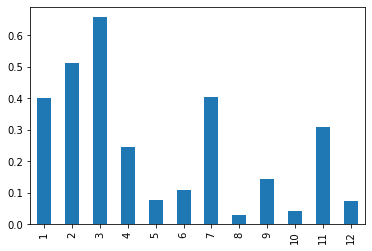

In [ ]:
A4_result['A4_ratio'].plot(kind='bar')

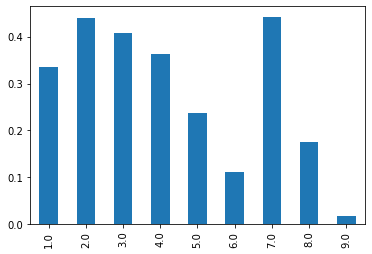

In [ ]:
B5_result['B5_ratio'].plot(kind='bar')

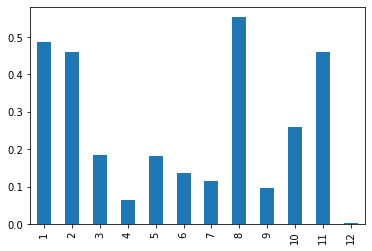

In [ ]:
D3_result['D3_ratio'].plot(kind='bar')

#### 막대 그래프 최종 데이터셋 csv로 export


비율을 백분율로 바꿔기

In [ ]:
B5_result['B5_ratio'] = B5_result['B5_ratio'] * 100
B5_result['B5_ratio'] = B5_result['B5_ratio'].round(1)
B5_result

,B5_sum,B5_ratio
1.0,1694.0,33.5
2.0,2223.0,44.0
3.0,2057.0,40.7
4.0,1834.0,36.3
5.0,1201.0,23.8
6.0,565.0,11.2
7.0,2235.0,44.3
8.0,882.0,17.5
9.0,89.0,1.8


In [ ]:
D3_result['D3_ratio'] = D3_result['D3_ratio'] * 100
D3_result['D3_ratio'] = D3_result['D3_ratio'].round(1)
D3_result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,D3_sum,D3_ratio
1,2462,48.8
2,2328,46.1
3,929,18.4
4,325,6.4
5,920,18.2
6,686,13.6
7,580,11.5
8,2796,55.4
9,482,9.5
10,1311,26.0


In [ ]:
# .to_csv() 활용
A4_result
B5_result.to_csv('/content/B5_result.csv', sep=',', na_rep='NaN' )
D3_result.to_csv('/content/D3_result.csv', sep=',', na_rep='NaN')

# 해야할 작업 남은 것들
1. A4, B5의 각 번호가 의미하는 데이터를 '리포트'에서 유추해 내기! - done
2. 하나의 그래프 당 하나의 데이터프레임을 만들어서 프론트에서 작업하기 좋게 데이터셋 구성하기 - done
3. 미세플라스틱 원인물질, 폐기용수, GHG 배출 데이터 소스 찾기 -> 한 줄짜기 데이터 만들기 -> 도넛차트 만들기 - done


### 미세플라스틱 1차 원인물질 - Synthetic fiber


데이터 프레임 만들기 (간단하게 synthetic textiles vs others) <br/>
source: IUCN https://www.iucn.org/resources/publication/primary-microplastics-oceans <br/>
export as .csv file

In [ ]:
df = pd.DataFrame(columns = ['synthetic textiles', 'others'])
df.loc[0] = [35, 65]
print(df)
df.to_csv('/content/microplastics.csv', sep=',', na_rep='NaN')

  synthetic textiles others
0                 35     65



### 패션 산업 탄소배출 10% - a Donut Chart
source: World Bank https://www.worldbank.org/en/news/feature/2019/09/23/costo-moda-medio-ambiente 


In [ ]:
df1 = pd.DataFrame(columns = ['fashion industry', 'others'])
df1.loc[0] = [10, 90]
print(df1)
df1.to_csv('/content/ghg_emission.csv', sep=',', na_rep='NaN')

  fashion industry others
0               10     90


### 패션 산업 산업용수 20% - 이것도 Donut chart
source: worldbank (탄소배출과 소스가 같음)

In [ ]:
df2 = pd.DataFrame(columns = ['fashion industry', 'others'])
df2.loc[0] = [20, 80]
print(df2)
df2.to_csv('/content/wastewater.csv', sep=',', na_rep='NaN')

  fashion industry others
0               20     80
